In [95]:
# 🗳️ Election Survey Analysis - Phase 1
# Author: [Your Name]
# Group: [Your Group Letter]
# Description: Analyze raw survey data to understand voter behavior and demographics.

# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# 📁 Load Data
private_data_nonanno = pd.read_excel("private_dataF.xlsx", engine="openpyxl")
private_data_anno = pd.read_csv("anonymised_dataF_sup22.csv")
public_register = pd.read_excel("public_data_registerF.xlsx", engine="openpyxl")
public_results = pd.read_excel("public_data_resultsF.xlsx", engine="openpyxl")




=== POLLING STATIONS: Survey vs Election ===
Chi-square = 0.466, p-value = 0.4947
→ No significant difference for polling voters

=== E-VOTERS: Survey vs Election ===
Chi-square = 2.168, p-value = 0.1409
→ No significant difference for e-voters


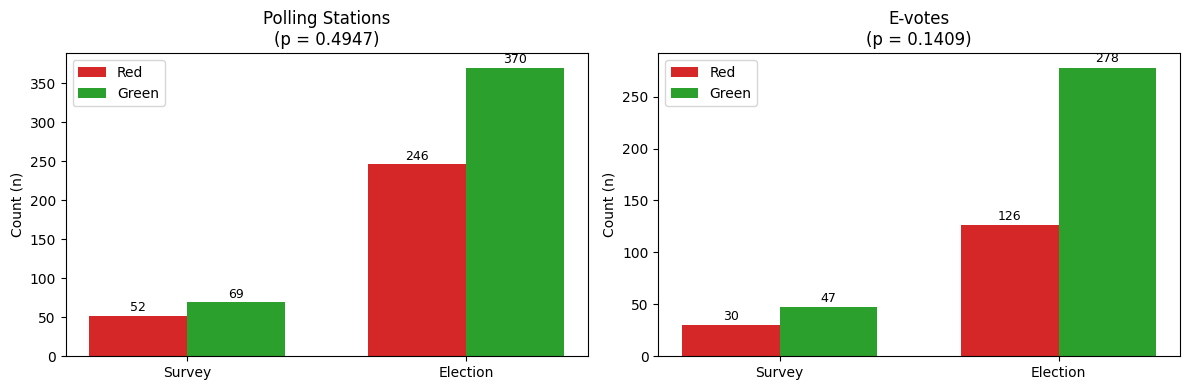

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, chi2_contingency

# === Load data ===
# (Assumes you already have dataframes: public_results and private_data)

# --- Split election results ---
polling = public_results[public_results['Unnamed: 0'].str.contains('Polling', na=False)]
evotes = public_results[public_results['Unnamed: 0'].str.contains('E-votes', na=False)]

polling_red, polling_green = polling['Red'].sum(), polling['Green'].sum()
evotes_red, evotes_green = evotes['Red'].sum(), evotes['Green'].sum()

# --- Split survey by voting method ---
survey_polling = private_data_nonanno[private_data_nonanno['evote'] == 0]
survey_evoting = private_data_nonanno[private_data_nonanno['evote'] == 1]

survey_polling_red = (survey_polling['party'] == 'Red').sum()
survey_polling_green = (survey_polling['party'] == 'Green').sum()
survey_evoting_red = (survey_evoting['party'] == 'Red').sum()
survey_evoting_green = (survey_evoting['party'] == 'Green').sum()

# --- Totals ---
survey_polling_total = survey_polling_red + survey_polling_green
survey_evoting_total = survey_evoting_red + survey_evoting_green
polling_total = polling_red + polling_green
evotes_total = evotes_red + evotes_green

# === TEST 1: Survey vs Election – Polling Stations ===
print("\n=== POLLING STATIONS: Survey vs Election ===")
expected_polling = survey_polling_total * np.array([
    polling_red / polling_total, polling_green / polling_total
])
observed_polling = np.array([survey_polling_red, survey_polling_green])

chi2_polling, p_polling = chisquare(observed_polling, expected_polling)
print(f"Chi-square = {chi2_polling:.3f}, p-value = {p_polling:.4f}")
if p_polling < 0.05:
    print("→ Significant difference: survey (polling) differs from election results")
else:
    print("→ No significant difference for polling voters")

# === TEST 2: Survey vs Election – E-votes ===
print("\n=== E-VOTERS: Survey vs Election ===")
expected_evoting = survey_evoting_total * np.array([
    evotes_red / evotes_total, evotes_green / evotes_total
])
observed_evoting = np.array([survey_evoting_red, survey_evoting_green])

chi2_evoting, p_evoting = chisquare(observed_evoting, expected_evoting)
print(f"Chi-square = {chi2_evoting:.3f}, p-value = {p_evoting:.4f}")
if p_evoting < 0.05:
    print("→ Significant difference: survey (e-votes) differs from election results")
else:
    print("→ No significant difference for e-voters")

# === Visual comparison ===
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x = np.arange(2)
width = 0.35

# --- Helper to annotate bars ---
def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 2,
            f"{int(height)}",
            ha='center', va='bottom', fontsize=9
        )

# --- Polling stations ---
bars1 = axes[0].bar(
    x - width/2,
    [survey_polling_red, polling_red],
    width, label='Red', color='#d62728'
)
bars2 = axes[0].bar(
    x + width/2,
    [survey_polling_green, polling_green],
    width, label='Green', color='#2ca02c'
)
annotate_bars(axes[0], bars1)
annotate_bars(axes[0], bars2)

axes[0].set_xticks(x)
axes[0].set_xticklabels(['Survey', 'Election'])
axes[0].set_ylabel('Count (n)')
axes[0].set_title(f"Polling Stations\n(p = {p_polling:.4f})")
axes[0].legend()

# --- E-votes ---
bars3 = axes[1].bar(
    x - width/2,
    [survey_evoting_red, evotes_red],
    width, label='Red', color='#d62728'
)
bars4 = axes[1].bar(
    x + width/2,
    [survey_evoting_green, evotes_green],
    width, label='Green', color='#2ca02c'
)
annotate_bars(axes[1], bars3)
annotate_bars(axes[1], bars4)

axes[1].set_xticks(x)
axes[1].set_xticklabels(['Survey', 'Election'])
axes[1].set_ylabel('Count (n)')
axes[1].set_title(f"E-votes\n(p = {p_evoting:.4f})")
axes[1].legend()

plt.tight_layout()
plt.show()


=== DATA SUMMARY ===
Total survey records: 197
Suppressed 'evote' entries: 0 (0.0%)

=== POLLING STATIONS: Survey vs Election ===
Chi-square = 1.470, p-value = 0.2254
→ No significant difference for polling voters

=== E-VOTERS: Survey vs Election ===
Chi-square = 1.720, p-value = 0.1897
→ No significant difference for e-voters


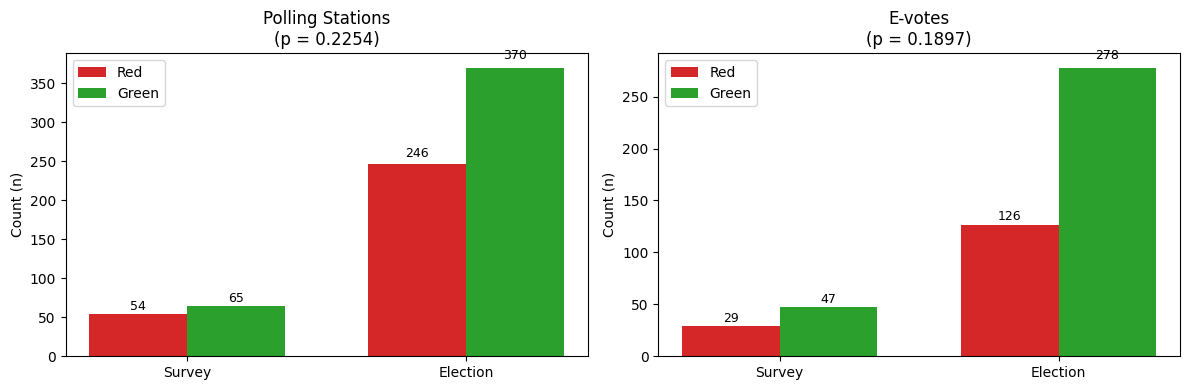

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# === Split election results ===
polling = public_results[public_results['Unnamed: 0'].str.contains('Polling', na=False)]
evotes = public_results[public_results['Unnamed: 0'].str.contains('E-votes', na=False)]

polling_red, polling_green = polling['Red'].sum(), polling['Green'].sum()
evotes_red, evotes_green = evotes['Red'].sum(), evotes['Green'].sum()

polling_total = polling_red + polling_green
evotes_total = evotes_red + evotes_green

# === Handle suppression in anonymized dataset ===
private_data_clean = private_data_anno.copy()

suppressed_count = private_data_clean['evote'].isna().sum()
total_count = len(private_data_clean)

print(f"\n=== DATA SUMMARY ===")
print(f"Total survey records: {total_count}")
print(f"Suppressed 'evote' entries: {suppressed_count} ({suppressed_count/total_count*100:.1f}%)")

# Keep only records with known evote status
private_data_known = private_data_clean.dropna(subset=['evote'])

# --- Split survey by voting method ---
survey_polling = private_data_known[private_data_known['evote'] == 0]
survey_evoting = private_data_known[private_data_known['evote'] == 1]

def summarize_survey(df):
    red = (df['party'] == 'Red').sum()
    green = (df['party'] == 'Green').sum()
    total = red + green
    return red, green, total

survey_polling_red, survey_polling_green, survey_polling_total = summarize_survey(survey_polling)
survey_evoting_red, survey_evoting_green, survey_evoting_total = summarize_survey(survey_evoting)

# === TEST 1: Survey vs Election – Polling Stations ===
print("\n=== POLLING STATIONS: Survey vs Election ===")
if survey_polling_total > 0:
    expected_polling = survey_polling_total * np.array([
        polling_red / polling_total, polling_green / polling_total
    ])
    observed_polling = np.array([survey_polling_red, survey_polling_green])
    chi2_polling, p_polling = chisquare(observed_polling, expected_polling)
    print(f"Chi-square = {chi2_polling:.3f}, p-value = {p_polling:.4f}")
    if p_polling < 0.05:
        print("→ Significant difference: survey (polling) differs from election results")
    else:
        print("→ No significant difference for polling voters")
else:
    p_polling = np.nan
    print("⚠️ No unsuppressed polling records available for comparison.")
    
# === TEST 2: Survey vs Election – E-votes ===
print("\n=== E-VOTERS: Survey vs Election ===")
if survey_evoting_total > 0:
    expected_evoting = survey_evoting_total * np.array([
        evotes_red / evotes_total, evotes_green / evotes_total
    ])
    observed_evoting = np.array([survey_evoting_red, survey_evoting_green])
    chi2_evoting, p_evoting = chisquare(observed_evoting, expected_evoting)
    print(f"Chi-square = {chi2_evoting:.3f}, p-value = {p_evoting:.4f}")
    if p_evoting < 0.05:
        print("→ Significant difference: survey (e-votes) differs from election results")
    else:
        print("→ No significant difference for e-voters")
else:
    p_evoting = np.nan
    print("⚠️ No unsuppressed e-voting records available for comparison.")

# === Visual comparison (Counts) ===
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x = np.arange(2)
width = 0.35

def annotate_bars(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + max(1, height * 0.02),
                f"{int(height)}", ha='center', va='bottom', fontsize=9)

# --- Polling stations ---
if survey_polling_total > 0:
    bars1 = axes[0].bar(
        x - width/2,
        [survey_polling_red, polling_red],
        width, label='Red', color='#d62728'
    )
    bars2 = axes[0].bar(
        x + width/2,
        [survey_polling_green, polling_green],
        width, label='Green', color='#2ca02c'
    )
    annotate_bars(axes[0], bars1)
    annotate_bars(axes[0], bars2)
    axes[0].set_title(f"Polling Stations\n(p = {p_polling:.4f})")
else:
    axes[0].text(0.5, 0.5, 'Suppressed / no data', ha='center', va='center', fontsize=12)
    axes[0].set_title("Polling Stations (no data)")

axes[0].set_xticks(x)
axes[0].set_xticklabels(['Survey', 'Election'])
axes[0].set_ylabel('Count (n)')
axes[0].legend()

# --- E-votes ---
if survey_evoting_total > 0:
    bars3 = axes[1].bar(
        x - width/2,
        [survey_evoting_red, evotes_red],
        width, label='Red', color='#d62728'
    )
    bars4 = axes[1].bar(
        x + width/2,
        [survey_evoting_green, evotes_green],
        width, label='Green', color='#2ca02c'
    )
    annotate_bars(axes[1], bars3)
    annotate_bars(axes[1], bars4)
    axes[1].set_title(f"E-votes\n(p = {p_evoting:.4f})")
else:
    axes[1].text(0.5, 0.5, 'Suppressed / no data', ha='center', va='center', fontsize=12)
    axes[1].set_title("E-votes (no data)")

axes[1].set_xticks(x)
axes[1].set_xticklabels(['Survey', 'Election'])
axes[1].set_ylabel('Count (n)')
axes[1].legend()

plt.tight_layout()
plt.show()



=== CHI-SQUARE TESTS: Attribute × Party (Counts, No Bar Labels) ===

=== Sex × Party ===

Contingency table (counts):
party   Red  Green
sex               
Female   55     56
Male     28     56

Chi-square = 4.501, p-value = 0.0339, dof = 1
→ Significant association between sex and party


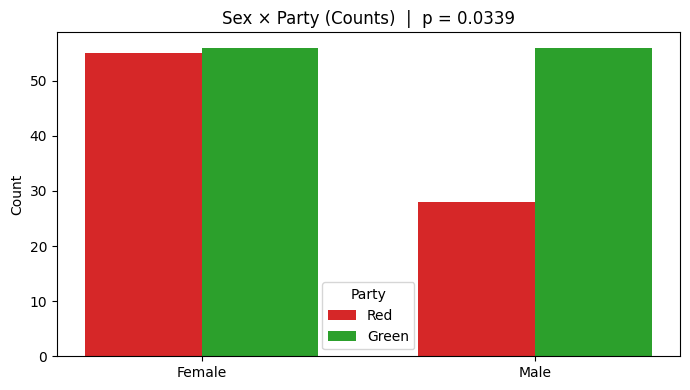


=== Education × Party ===

Contingency table (counts):
party             Red  Green
education                   
Higher education   49     22
Lower education    34     90

Chi-square = 30.273, p-value = 0.0000, dof = 1
→ Significant association between education and party


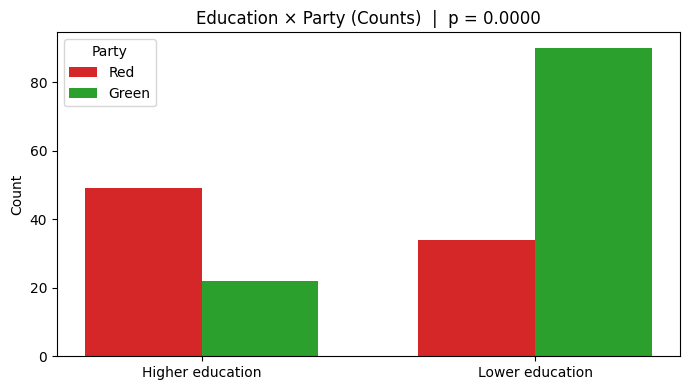


=== Marital Status × Party ===

Contingency table (counts):
party           Red  Green
marital_status            
Married          45     43
Not married      38     69

Chi-square = 4.203, p-value = 0.0404, dof = 1
→ Significant association between marital_status and party


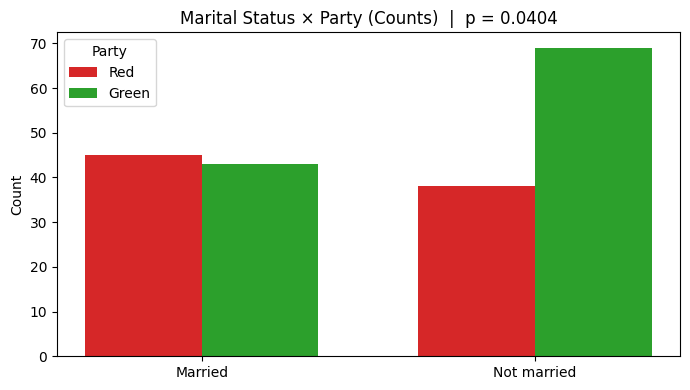


=== Age Group × Party ===

Contingency table (counts):
party      Red  Green
age_group            
18-30        5     17
31-50       21     58
51+         57     37

Chi-square = 24.356, p-value = 0.0000, dof = 2
→ Significant association between age_group and party


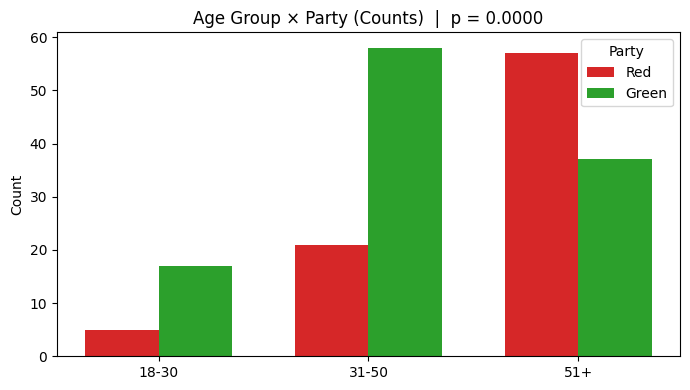

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# === Load anonymized dataset ===
df = private_data_anno

# === Attributes to test ===
attributes = ["sex", "education", "marital_status", "age_group"]

print("\n=== CHI-SQUARE TESTS: Attribute × Party (Counts, No Bar Labels) ===")

# === Define color scheme ===
colors = {
    "Red": "#d62728",
    "Green": "#2ca02c"
}

for attr in attributes:
    print(f"\n=== {attr.replace('_',' ').title()} × Party ===")
    
    sub = df[[attr, "party"]].dropna()

    if sub[attr].nunique() < 2:
        print(f"⚠️ Skipping {attr} — only one category after anonymization.")
        continue

    table = pd.crosstab(sub[attr], sub["party"])

    for p in ["Red", "Green"]:
        if p not in table.columns:
            table[p] = 0
    table = table[["Red", "Green"]]

    print("\nContingency table (counts):")
    print(table)

    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\nChi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
    if p < 0.05:
        print(f"→ Significant association between {attr} and party")
    else:
        print(f"→ No significant association between {attr} and party")

    # --- Visualisation: counts only, no bar labels ---
    categories = table.index
    red_counts = table["Red"].astype(int).values
    green_counts = table["Green"].astype(int).values

    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(x - width/2, red_counts, width, label="Red", color=colors["Red"])
    ax.bar(x + width/2, green_counts, width, label="Green", color=colors["Green"])

    ax.set_title(f"{attr.replace('_',' ').title()} × Party (Counts)  |  p = {p:.4f}")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=0)
    ax.set_ylabel("Count")
    ax.legend(title="Party")
    plt.tight_layout()
    plt.show()


=== CHI-SQUARE TESTS: Attribute × Evote (Counts, No Bar Labels) ===

=== Sex × Evote ===

Contingency table (counts):
evote   0.0  1.0
sex             
Female   73   40
Male     47   39

Chi-square = 1.626, p-value = 0.2023, dof = 1
→ No significant association between sex and evote


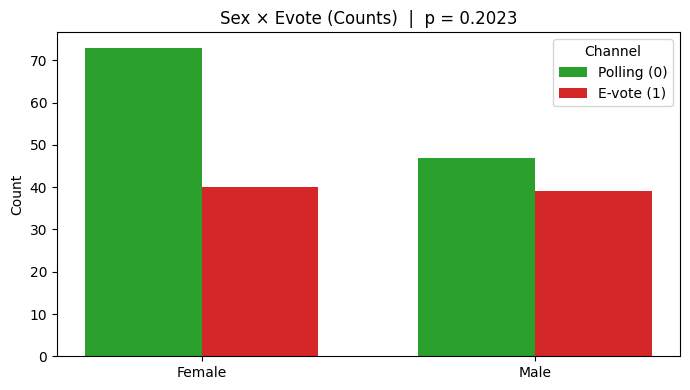


=== Education × Evote ===

Contingency table (counts):
evote             0.0  1.0
education                 
Higher Education   81   52
Lower Education    39   27

Chi-square = 0.008, p-value = 0.9267, dof = 1
→ No significant association between education and evote


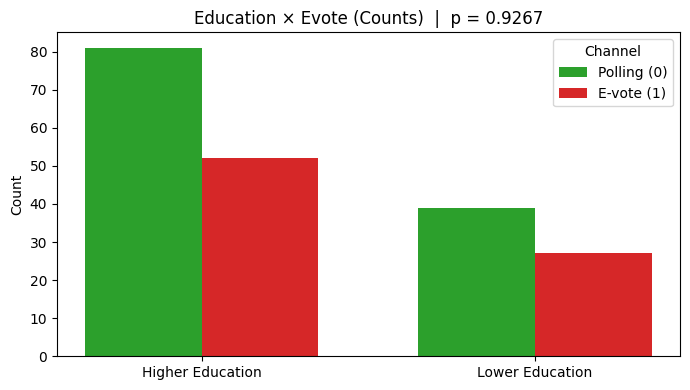


=== Marital Status × Evote ===

Contingency table (counts):
evote           0.0  1.0
marital_status          
Married          58   33
Not married      62   46

Chi-square = 0.583, p-value = 0.4451, dof = 1
→ No significant association between marital_status and evote


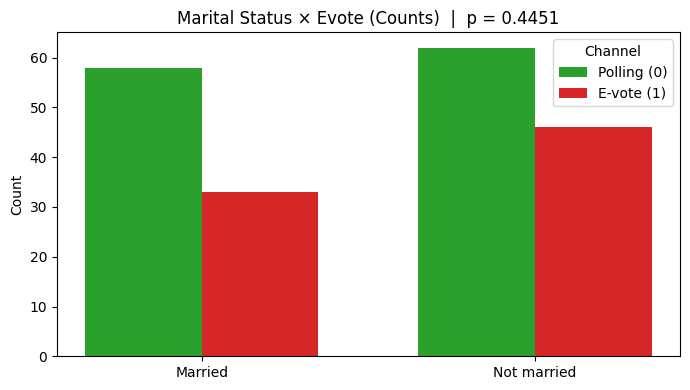


=== Age Group × Evote ===

Contingency table (counts):
evote      0.0  1.0
age_group          
18-30       13   10
31-50       36   42
51+         71   27

Chi-square = 12.700, p-value = 0.0017, dof = 2
→ Significant association between age_group and evote


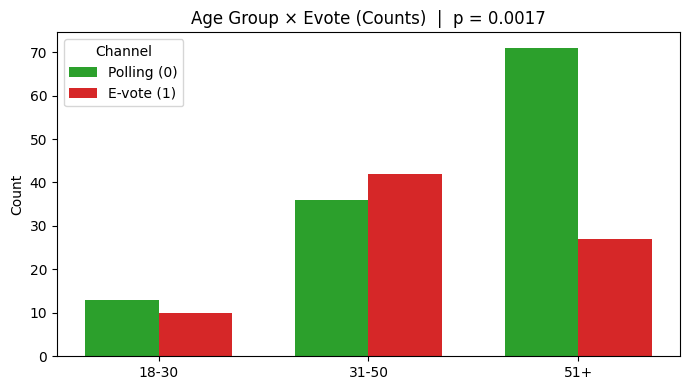

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# === Load anonymized dataset ===
df = pd.read_excel("pram_dataF.xlsx")

# === Keep only valid, unsuppressed evote values (0 = polling, 1 = e-vote) ===
df = df[df["evote"].isin([0, 1])]

# === Attributes to test ===
attributes = ["sex", "education", "marital_status", "age_group"]

print("\n=== CHI-SQUARE TESTS: Attribute × Evote (Counts, No Bar Labels) ===")

# === Define color scheme (match your Party script) ===
# We'll map: 0 (Polling) -> Green, 1 (E-vote) -> Red
colors = {
    "Red":   "#d62728",  # used for evote=1
    "Green": "#2ca02c"   # used for evote=0
}
legend_labels = {0: "Polling (0)", 1: "E-vote (1)"}

for attr in attributes:
    print(f"\n=== {attr.replace('_',' ').title()} × Evote ===")

    sub = df[[attr, "evote"]].dropna()

    if sub[attr].nunique() < 2:
        print(f"⚠️ Skipping {attr} — only one category after anonymization.")
        continue

    # Build contingency table (raw counts)
    table = pd.crosstab(sub[attr], sub["evote"])

    # Ensure both 0 and 1 columns exist and order them [0, 1]
    for v in [0, 1]:
        if v not in table.columns:
            table[v] = 0
    table = table[[0, 1]]

    print("\nContingency table (counts):")
    print(table)

    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"\nChi-square = {chi2:.3f}, p-value = {p:.4f}, dof = {dof}")
    if p < 0.05:
        print(f"→ Significant association between {attr} and evote")
    else:
        print(f"→ No significant association between {attr} and evote")

    # --- Visualisation: counts only, no bar labels ---
    categories = table.index
    polling_counts = table[0].astype(int).values   # evote = 0
    evote_counts   = table[1].astype(int).values   # evote = 1

    x = np.arange(len(categories))
    width = 0.35

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(x - width/2, polling_counts, width, label=legend_labels[0], color=colors["Green"])
    ax.bar(x + width/2, evote_counts,   width, label=legend_labels[1], color=colors["Red"])

    ax.set_title(f"{attr.replace('_',' ').title()} × Evote (Counts)  |  p = {p:.4f}")
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=0)
    ax.set_ylabel("Count")
    ax.legend(title="Channel")
    plt.tight_layout()
    plt.show()